In [1]:
import requests

In [3]:
city = 'London'
url = 'https://api.waqi.info/feed/' + city + '?token='
api_key = 'af42ef522d6d4b6ed271bb34d62272e6c8817600'


In [5]:
main_url = url +api_key

r = requests.get(main_url)

In [6]:
data = r.json()['data']
data

{'aqi': 21,
 'idx': 5724,
 'attributions': [{'url': 'http://uk-air.defra.gov.uk/',
   'name': 'UK-AIR, air quality information resource - Defra, UK',
   'logo': 'UK-Department-for-environment-food-and-rural-affairs.png'},
  {'url': 'https://londonair.org.uk/',
   'name': "London Air Quality Network - Environmental Research Group, King's College London",
   'logo': 'UK-London-Kings-College.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [51.5073509, -0.1277583],
  'name': 'London',
  'url': 'https://aqicn.org/city/london',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 6.4},
  'h': {'v': 78.8},
  'no2': {'v': 22},
  'o3': {'v': 7.3},
  'p': {'v': 997.7},
  'pm10': {'v': 10},
  'pm25': {'v': 21},
  'so2': {'v': 2.5},
  't': {'v': 5.5},
  'w': {'v': 2.6}},
 'time': {'s': '2023-01-15 18:00:00',
  'tz': '+00:00',
  'v': 1673805600,
  'iso': '2023-01-15T18:00:00Z'},
 'forecast': {'daily': {'o3': [{'avg': 24,
     'day': '

In [7]:
aqi = data['aqi']
iaqi = data['iaqi']

In [8]:
iaqi
del iaqi['p']

In [9]:
iaqi

{'co': {'v': 6.4},
 'h': {'v': 78.8},
 'no2': {'v': 22},
 'o3': {'v': 7.3},
 'pm10': {'v': 10},
 'pm25': {'v': 21},
 'so2': {'v': 2.5},
 't': {'v': 5.5},
 'w': {'v': 2.6}}

In [10]:
for i in iaqi.items():
    print(i[0], ':',i[1]['v'])

co : 6.4
h : 78.8
no2 : 22
o3 : 7.3
pm10 : 10
pm25 : 21
so2 : 2.5
t : 5.5
w : 2.6


In [73]:
import matplotlib.pyplot as plt

In [12]:
pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

In [13]:
explode = [0 for i in pollutants]
mx = values.index(max(values))
print(pollutants)
print(values)
explode[mx] = 0.1
print(explode)

['co', 'h', 'no2', 'o3', 'pm10', 'pm25', 'so2', 't', 'w']
[6.4, 78.8, 22, 7.3, 10, 21, 2.5, 5.5, 2.6]
[0, 0.1, 0, 0, 0, 0, 0, 0, 0]


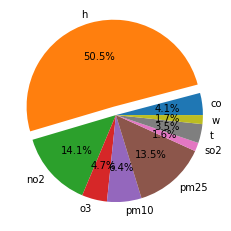

<Figure size 576x432 with 0 Axes>

In [20]:
plt.pie(values, labels=pollutants, autopct='%1.1f%%',explode = explode)
plt.figure(figsize=(8,6))
plt.show()

In [17]:
#conda install -c conda-forge cartopy

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Acer\anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |   py38h22a077f_2         1.8 MB
    conda-4.14.0               |   py38haa244fe_0         1.0 MB  conda-forge
    geos-3.8.0                 |       h33f27b4_0         905 KB
    proj-7.0.1                 |       hf5a9257_1         2.0 MB
    pyshp-2.3.1                |     pyhd8ed1ab_0         941 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    shapely-1.8.4              |   py38h9064783_0         365 KB
    ------------------------------------------------------------
                                           Total:         6.9 MB

The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/wi



==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [21]:
import cartopy.crs as ccrs

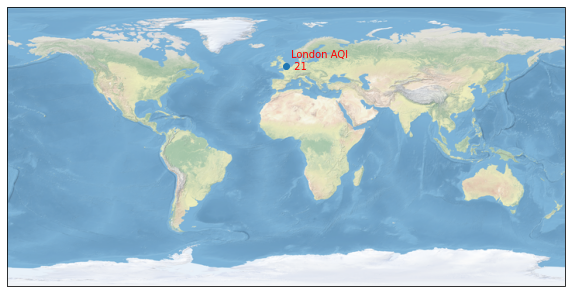

In [36]:
geo = data['city']['geo']
plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.scatter(geo[1], geo[0])
plt.text(geo[1] + 3, geo[0] - 2, f'{city} AQI \n {aqi}', color = 'red')
plt.show()

Historical Data Analysis

In [22]:
import pandas as pd
import numpy as np

In [32]:
csv_path = 'C:/Users/Acer/Downloads/london-air-quality.csv'
df = pd.read_csv(csv_path)
df.head(10)

,date,pm25,pm10,o3,no2,so2,co
0,2023/1/3,48,13,28,18,1,3
1,2023/1/4,36,18,27,9,1,1
2,2023/1/5,37,16,23,16,1,3
3,2023/1/6,30,8,25,19,1,3
4,2023/1/7,13,13,30,12,1,3
5,2023/1/8,29,15,28,15,2,4
6,2023/1/9,38,19,23,23,2,4
7,2023/1/10,47,18,26,21,1,1
8,2023/1/11,41,20,50,24,1,2
9,2023/1/12,40,18,29,21,1,2


In [33]:
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [34]:
df = df.rename(columns={' pm25':"pm25",
 ' pm10':"pm10",
  ' o3':"o3",
   ' no2':"no2",
   ' so2':"so2",
    ' co':"co"
})

In [35]:
df['date']=pd.to_datetime(df['date'])

In [128]:
df60 = df[df['date']>'2020-03-20'].sort_values(by='date').head(69)

In [129]:
df60.dtypes

date    datetime64[ns]
pm25            object
pm10            object
o3              object
no2             object
so2             object
co              object
dtype: object

In [130]:
df60.replace(' ',np.nan,inplace=True)
df60.dropna(inplace=True)

In [ ]:
#df60[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']] = df60[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].astype(int)

In [131]:
dates_lockdown = df60['date']
pm25_lockdown = df60['pm25']
pm25_lockdown = [int(i) for i in pm25_lockdown]

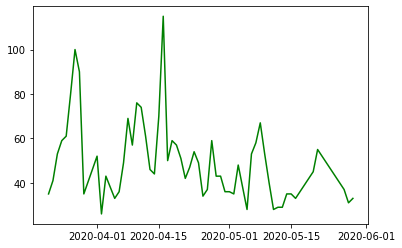

In [132]:
plt.plot(dates_lockdown,pm25_lockdown,color='green')
plt.show()

In [149]:
df_cur60 = df.head(60)

In [159]:
df_cur60['pm25']

0       48
1       36
2       37
3       30
4       13
5       29
6       38
7       47
8       41
9       40
10      37
11      49
12      34
13      29
14      82
15     119
16      75
17      47
18      44
19      41
20      29
21      33
22      33
23      38
24      45
25      54
26      59
27      44
28      23
29      41
30      51
31      54
32      53
33      70
34      53
35      45
36      45
37      46
38      40
39      49
40      38
41      38
42      45
43      29
44      33
45      34
46      41
47      44
48      66
49      56
50      41
51      48
52      40
53      41
54      44
55      42
56      54
57      64
58      74
59      34
Name: pm25, dtype: object

In [166]:
date_cur = df_cur60['date']
pm25_cur = df_cur60['pm25']
pm25_cur = [int(i) for i in pm25_cur]
pm25_cur.reverse()

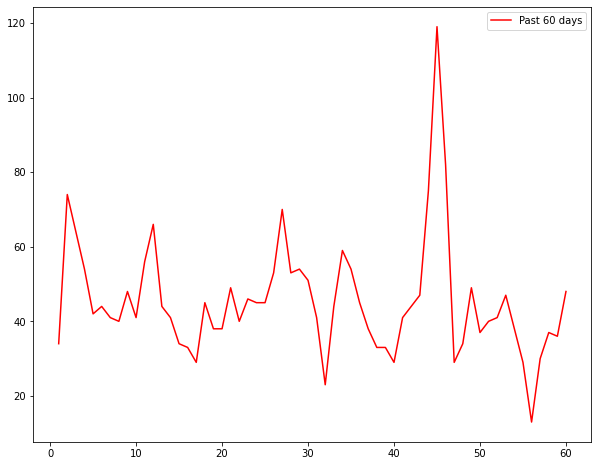

In [167]:
plt.figure(figsize=(10,8))
length = [i for i in range(1,len(dates_lockdown)+1)]
#plt.plot(length, pm25_lockdown,color='green',label='under lockdown')
plt.plot(length, pm25_cur,color='red',label='Past 60 days')
plt.legend()
plt.show()

In [91]:
dfclean=df.replace(' ',np.nan)
dfclean[dfclean['pm25']==dfclean['pm25'].min()]

In [93]:
dfclean.dropna(inplace=True)

In [142]:
dfclean['pm25'] = [int(i) for i in dfclean['pm25']]
dfclean[dfclean['pm25']==dfclean['pm25'].max()]

,date,pm25,pm10,o3,no2,so2,co
2125,2017-01-24,177,66,6,71,11,12


In [108]:
dfclean[dfclean['pm25']==dfclean['pm25'].min()]

,date,pm25,pm10,o3,no2,so2,co
4,2023-01-07,13,13,30,12,1,3
